Resistance: 998.0 kΩ, Thermal Noise PSD: 1.276214724879791e-07 V/sqrt(Hz)
Resistance: 510.0 kΩ, Thermal Noise PSD: 9.123123807117822e-08 V/sqrt(Hz)
Resistance: 250.0 kΩ, Thermal Noise PSD: 6.387464285614441e-08 V/sqrt(Hz)
Resistance: 1.4981 MΩ, Thermal Noise PSD: 1.563611595889465e-07 V/sqrt(Hz)


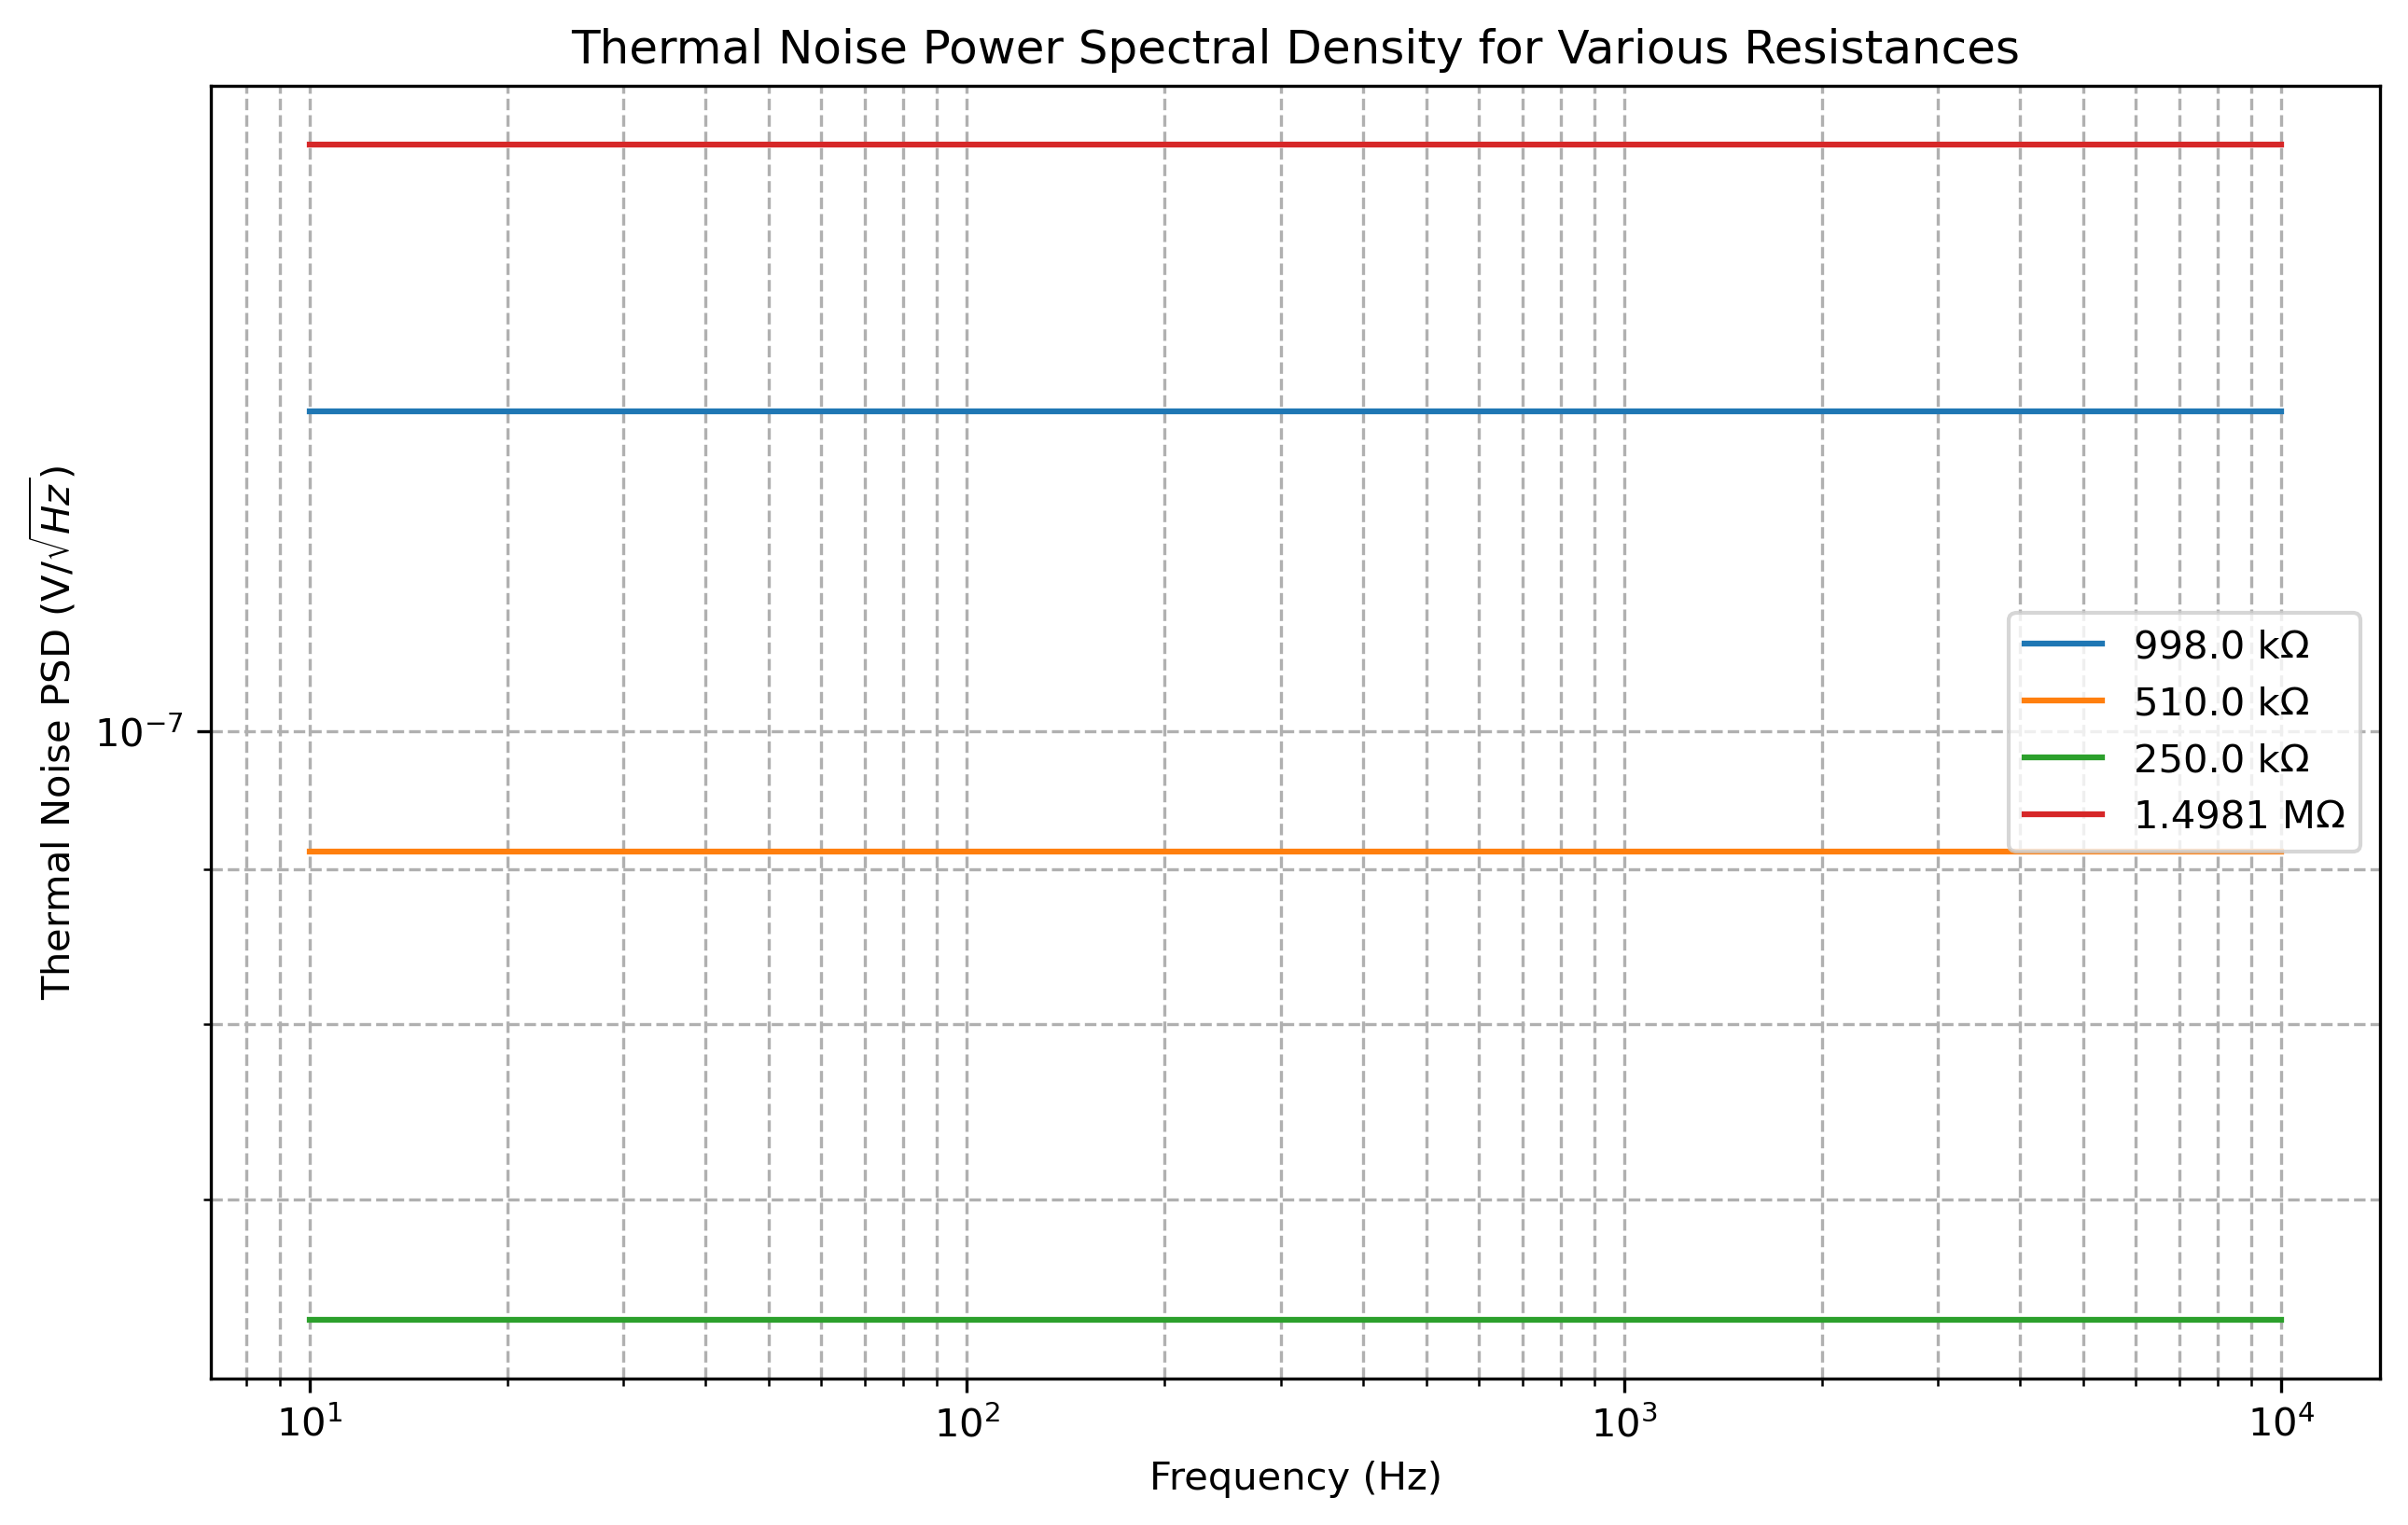

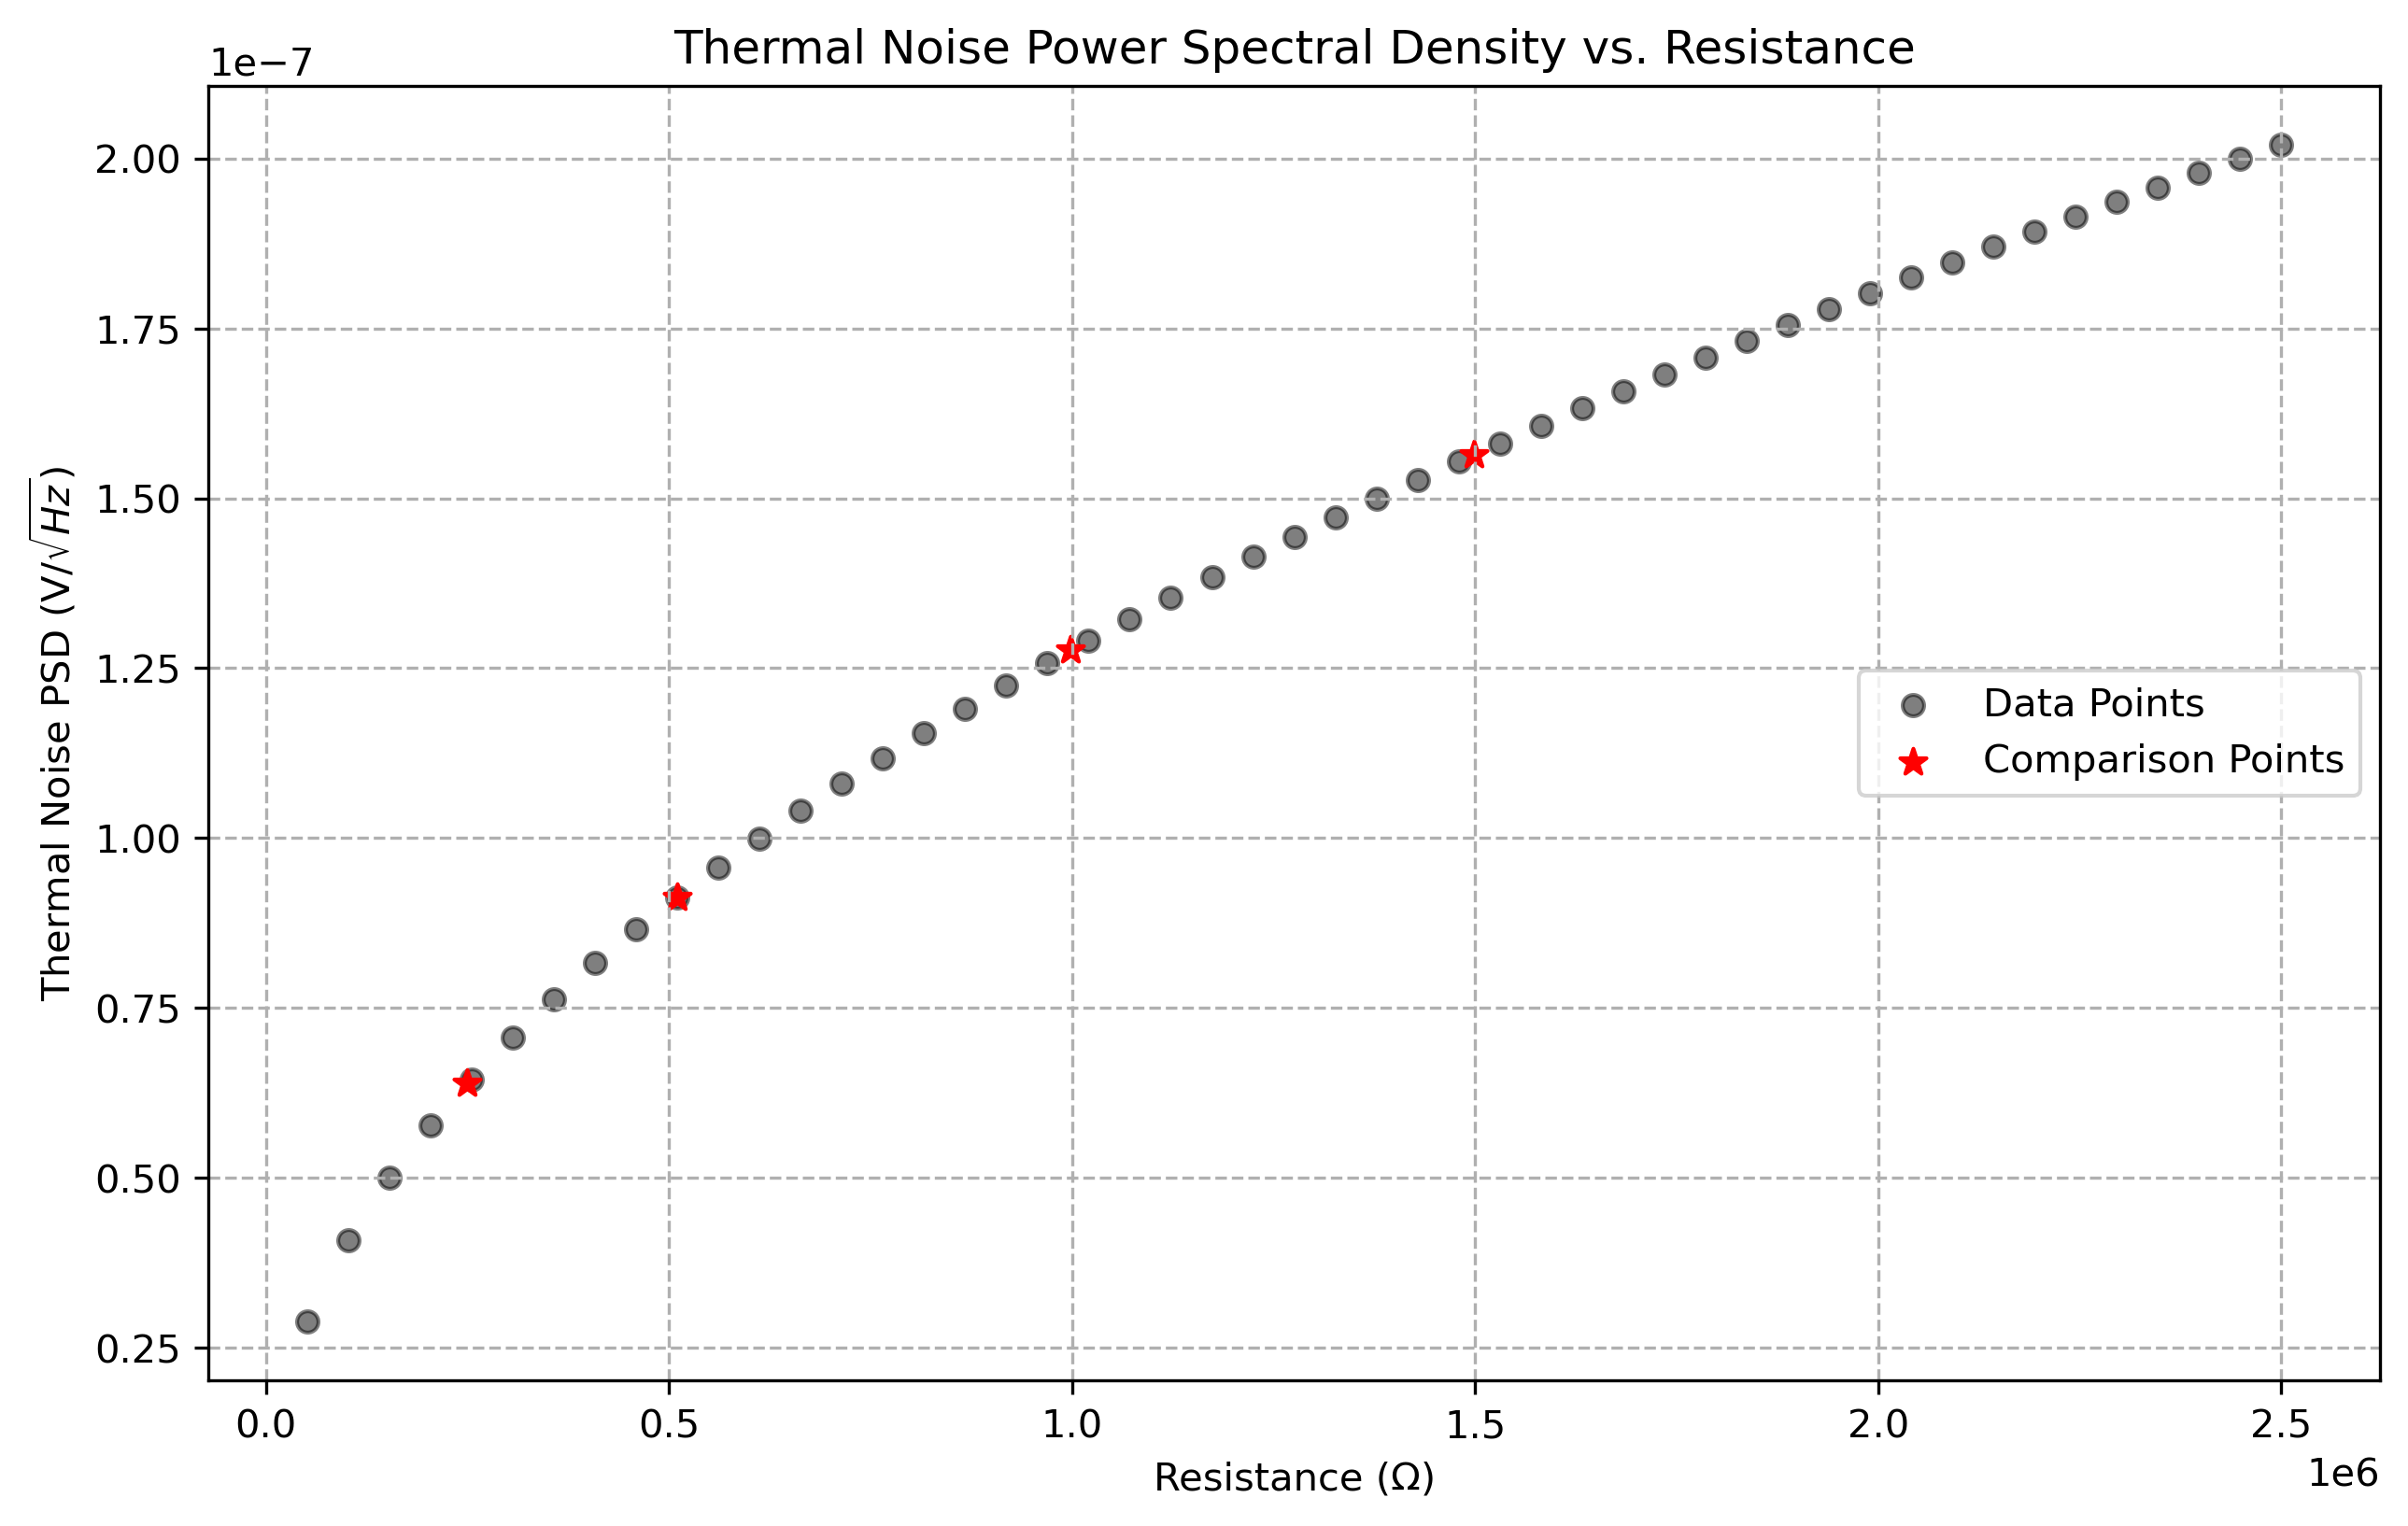

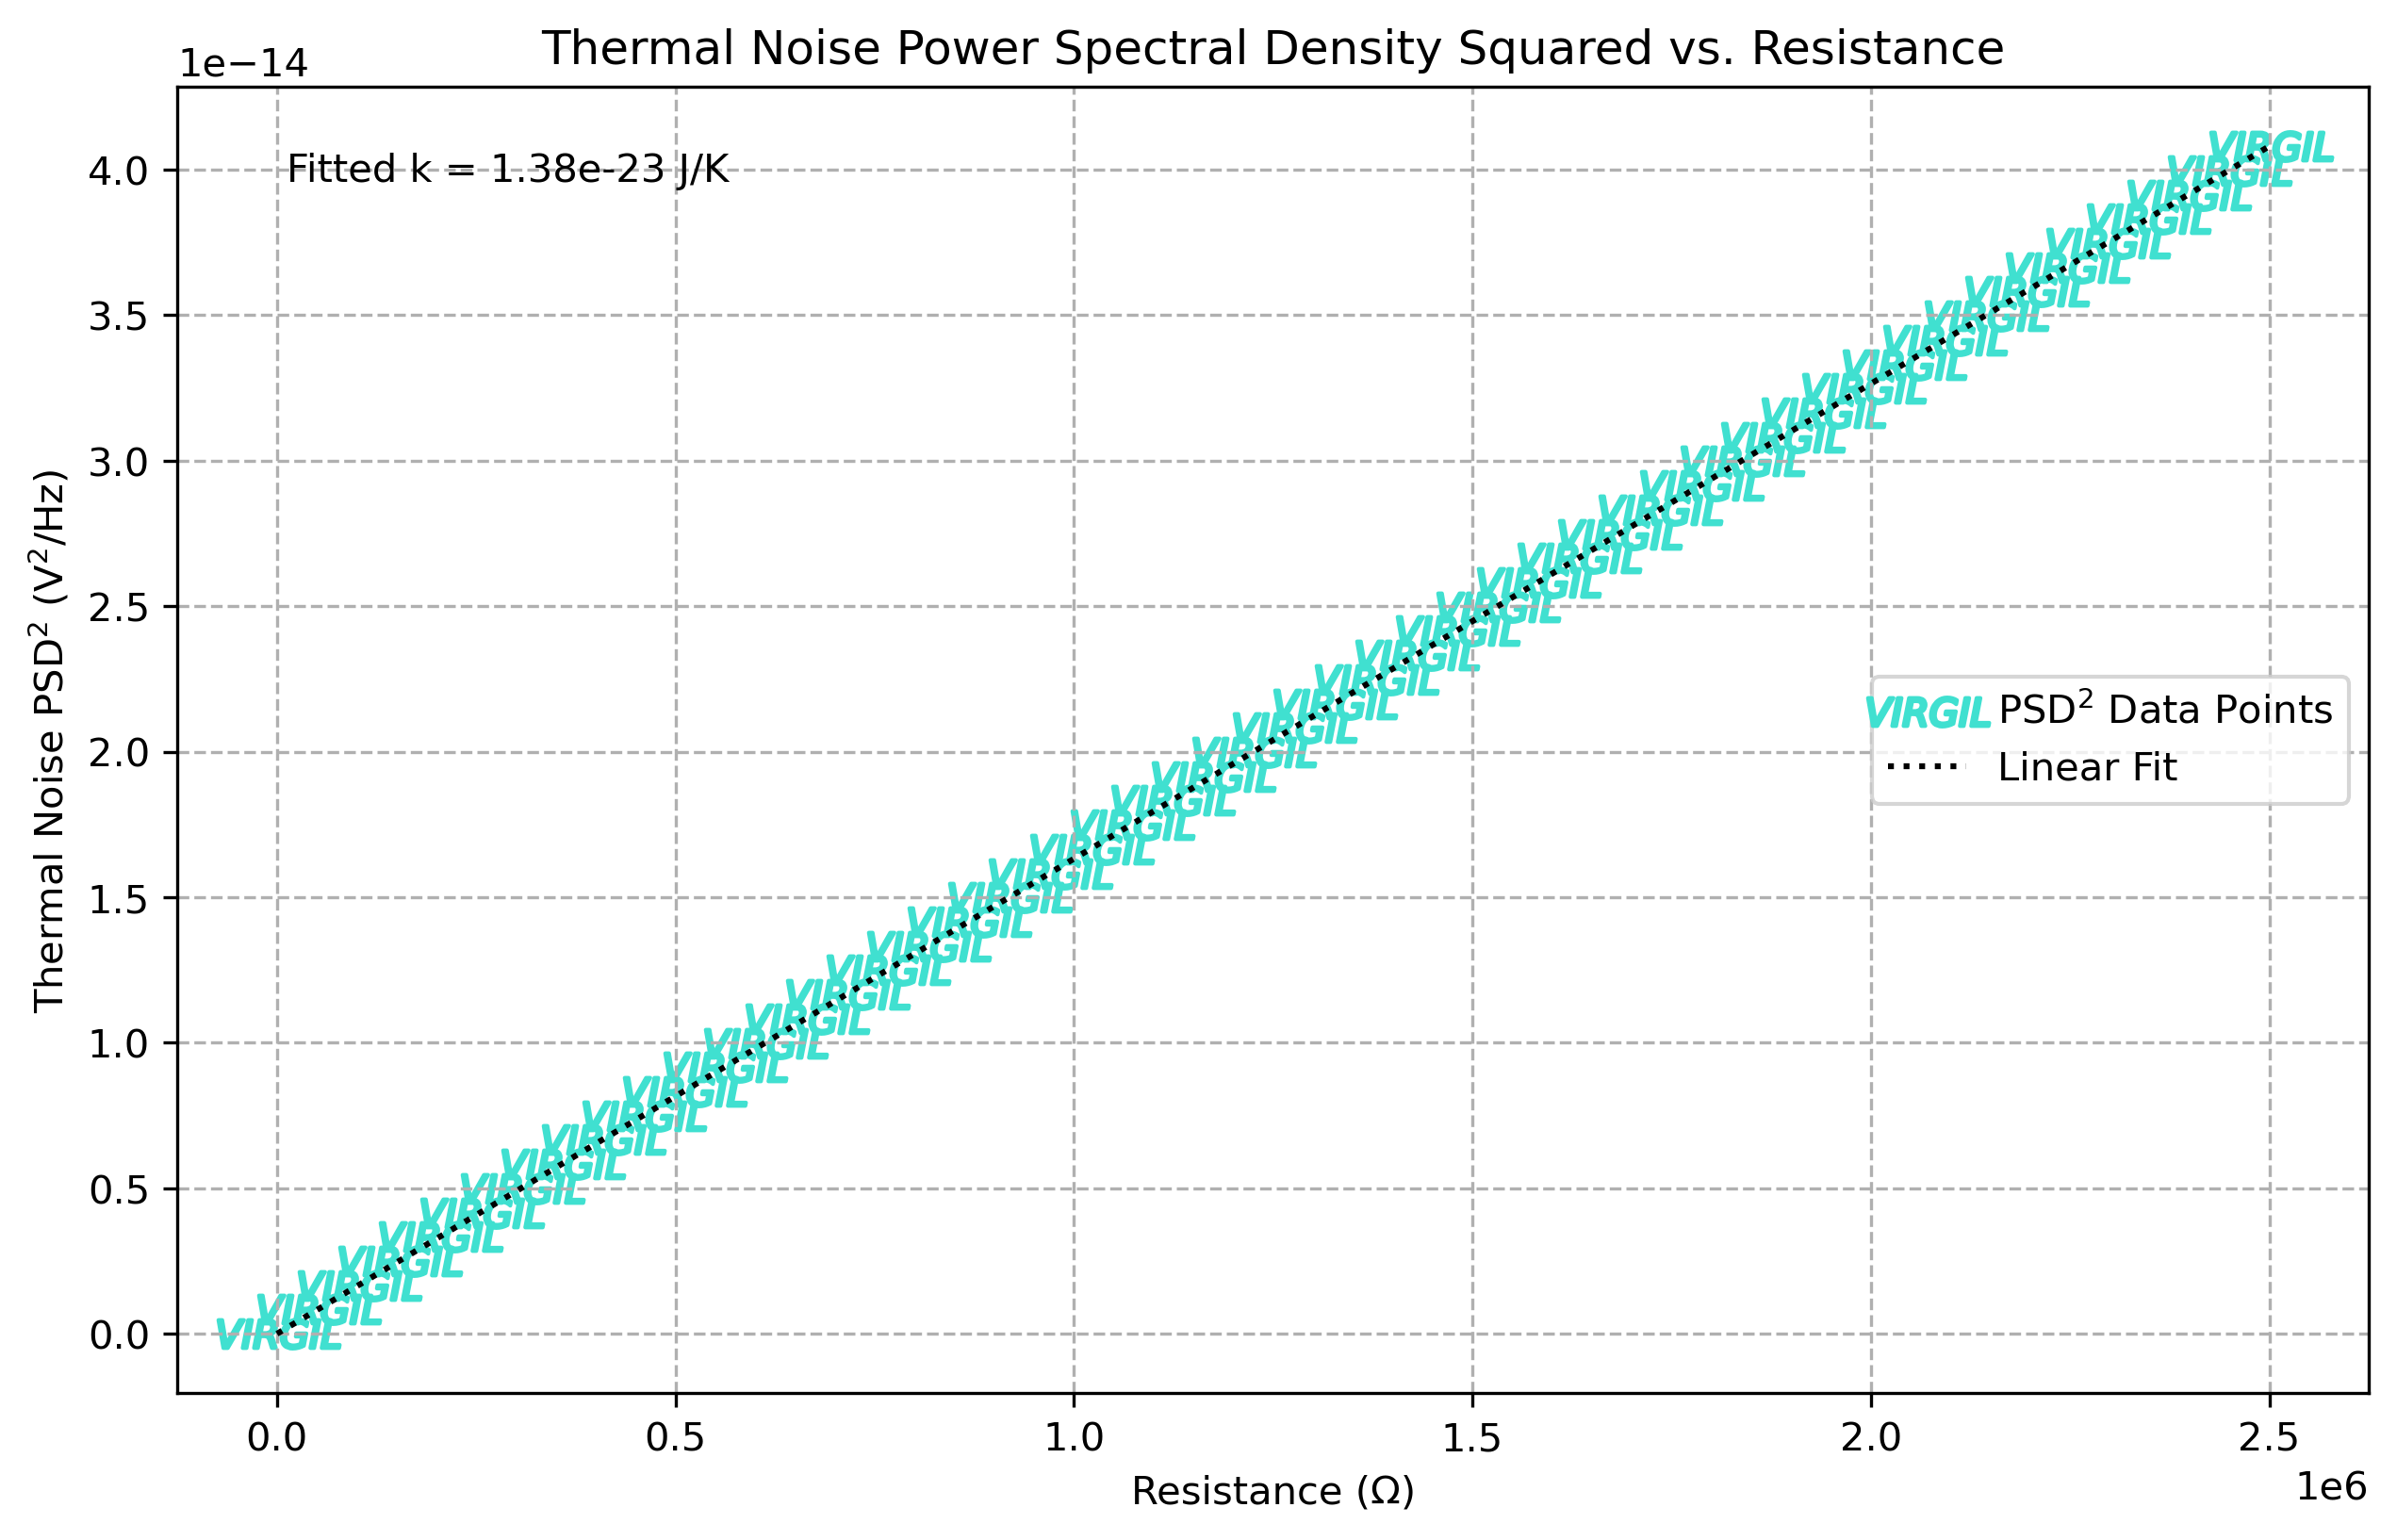

1.38e-23


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Plot parameters
plt.rcParams['figure.dpi'] = 300

# Constants
k = 1.38e-23  # Boltzmann's constant in J/K
T = 22.5+273.15       # Temperature in Kelvin
#T = 70 
# Resistance values in Ohms
special_resistances = [0.998e6, 510e3, 250e3, 1.4981e6] #Omitted the 50 ohm value
resistance_values = np.linspace(0,2.5e6)
# Function to calculate thermal noise PSD
def thermal_noise_psd(R):
    return np.sqrt(4 * k * T * R)

# Function to format resistance value for label
def format_resistance_label(R):
    if R >= 1e6:  # Mega-Ohms
        return f'{R/1e6} MΩ'
    elif R >= 1e3:  # kilo-Ohms
        return f'{R/1e3} kΩ'
    else:  # Ohms
        return f'{R} Ω'

# Frequency range for plotting (for visual representation only)
frequencies = np.linspace(10, 10000, 1000)  # 10 Hz to 10 kHz

# Plotting
plt.figure(figsize=(10, 6))
for R in special_resistances:
    noise_psd = thermal_noise_psd(R)
    resistance_label = format_resistance_label(R)
    print(f'Resistance: {resistance_label}, Thermal Noise PSD: {noise_psd} V/sqrt(Hz)')
    plt.plot(frequencies, [noise_psd] * len(frequencies), label=resistance_label)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Thermal Noise PSD (V/$\sqrt{Hz}$)")
plt.title("Thermal Noise Power Spectral Density for Various Resistances")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

#%%


# Calculate thermal noise PSD for all resistance values
noise_psd_values = np.array([thermal_noise_psd(R) for R in resistance_values if R > 0])

# Plotting
plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(resistance_values[1:], noise_psd_values, label='Data Points', s=30, alpha=0.5, color = 'black')  # Adjust for exclusion of 0

# Highlight special data points
special_noise_psd_values = np.array([thermal_noise_psd(R) for R in special_resistances])
plt.scatter(special_resistances, special_noise_psd_values, color='red', s=50, label='Comparison Points', marker='*')


plt.xlabel("Resistance (Ω)")
plt.ylabel("Thermal Noise PSD (V/$\sqrt{Hz}$)")
plt.title("Thermal Noise Power Spectral Density vs. Resistance")
plt.legend(loc='right')
plt.grid(True, which="both", ls="--")
plt.show()

#%%
# Function to calculate thermal noise PSD squared
def thermal_noise_psd_squared(R, k):
    return 4 * k * T * R
# Calculate thermal noise PSD squared for all resistance values
noise_psd_squared_values = np.array([thermal_noise_psd_squared(R, 1.38e-23) for R in resistance_values])

# Perform linear fit to find k
# Note: We use dummy k=1.38e-23 just for the purpose of calculating PSD^2, the actual fitting will determine k
popt, pcov = curve_fit(lambda R, k: thermal_noise_psd_squared(R, k), resistance_values, noise_psd_squared_values)

# Extract fitted Boltzmann's constant
k_fitted = popt[0]

# Plotting
plt.figure(figsize=(10, 6))

# Plot PSD^2 vs Resistance
plt.scatter(resistance_values, noise_psd_squared_values, label='PSD$^2$ Data Points', s=1000, alpha=1, marker = "$VIRGIL$", color = 'turquoise')

# Plot the linear fit line
plt.plot(resistance_values, thermal_noise_psd_squared(resistance_values, k_fitted), color='black', label='Linear Fit', linestyle='dotted')

# Display the fitted Boltzmann's constant on the plot
equation_text = f'Fitted k = {k_fitted:.2e} J/K'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.xlabel("Resistance (Ω)")
plt.ylabel("Thermal Noise PSD$^2$ (V$^2$/Hz)")
plt.title("Thermal Noise Power Spectral Density Squared vs. Resistance")
plt.legend(loc='right')
plt.grid(True, which="both", ls="--")
plt.show()

# Output the fitted Boltzmann's constant for reference
print(k_fitted)